# Label annotating for human breast cancer dataset

## Data preprocessing

In [ ]:
import stSCI
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns

sc_adata = sc.read('data/human_brest_cancer/human_bc_scrna.h5ad')
st_adata = sc.read_visium('data/data/human_brest_cancer/hbc')
sc.pp.normalize_total(st_adata, target_sum=1e4)
sc.pp.normalize_total(sc_adata, target_sum=1e4)
sc.pp.log1p(st_adata)
sc.pp.log1p(sc_adata)

## Model training
For label inference, user need to set the `deconvolution` parameter to `True`.

In [2]:
sc_adata, st_adata = stSCI.train(sc_adata, st_adata, cluster_key='celltype_minor', cluster_method='louvain', clustering=True, deconvolution=True)

>>> INFO: Filtered 0 genes.
>>> INFO: Find 3000 same HVGs, result data shapes: [(40000, 3000), (2518, 3000)].
>>> INFO: Generate 17626 edges, 6.000 edges per spot (0.01s).
>>> INFO: Finish PCA (2.28s).
>>> INFO: Finish centroid generation (2.15s).
>>> INFO: Finish centroid generation (0.04s).


>>> Train stSCI: 100%|██████████| 500/500 [01:24<00:00,  5.89it/s]


>>> INFO: Generate 104172 MNN pairs, 2.604 pairs per SC cell; 41.371 pairs per ST spot (0.91s).
>>> INFO: Finish generate deconvolution result (0.21s).
>>> INFO: Train stSCI model (105.42s).


## Generate the correlation matrix

We utilize the matrix generated from deconvolution results and categorize it by the clustering results to form the correlation matrix. To clearly illustrate the correlation of T cells within SC data, we specifically extract and visualize the portion of the correlation matrix for SC T cells.

<Axes: >

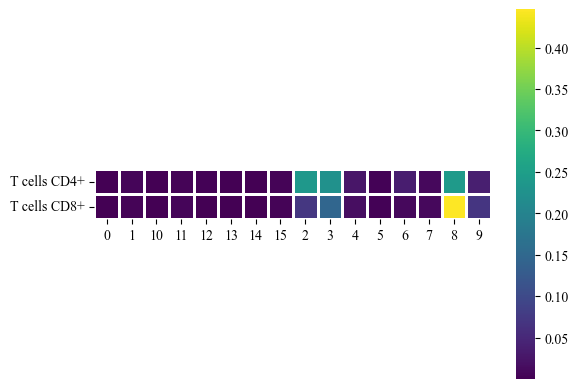

In [3]:
cluster_list = np.unique(st_adata.obs['cluster_result'])
sim_matrix = np.array([
    np.mean(st_adata.obsm['decon_result'][cluster == st_adata.obs['cluster_result']], axis=0) 
    for cluster in cluster_list
])
sim_df = pd.DataFrame(sim_matrix, index=cluster_list, columns=st_adata.obsm['decon_result'].columns)
sns.heatmap(sim_df[['T cells CD4+', 'T cells CD8+']].T, square=True, cmap='viridis', linewidths=2, linecolor='white')

The correlation matrix shows that cluster 2, 3, 8 is high correlated with T cell. We visialized the T cell marker gene TRBC2 and the annotated T cell related spatial domain.

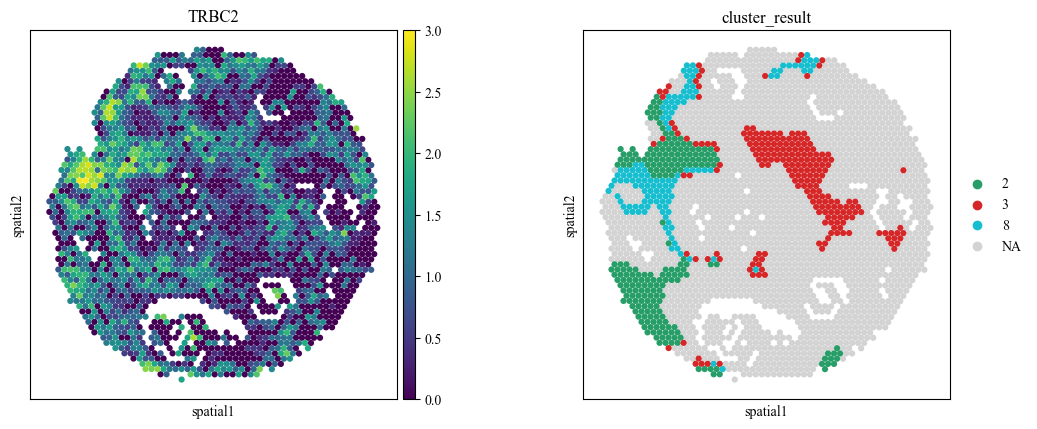

In [4]:
sc.pl.spatial(st_adata, color=["TRBC2", "cluster_result"], groups=["2", "3", "8"], img_key=None, spot_size=300)